מגישים: עמית אברמוביץ-318969045 ויוסי חדד-325294429

## 0. Setting the kaggle API And downloading the dataset 

In [41]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline

In [ ]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

!mkdir /root/.kaggle/ 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"<>","key":"<>"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

**Cars API:**

In [ ]:
# searching for the dataset
!kaggle datasets list -s car

In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/Cars

# download the dataset from Kaggle and unzip it
!kaggle datasets download doaaalsenani/usa-cers-dataset -p ./datasets/Cars/
!chdir ./datasets/Cars
!unzip "/content/datasets/Cars/usa-cers-dataset.zip" -d "/content/datasets/Cars/"
!ls ./datasets/Cars

**Billionaires API:**

In [ ]:
# searching for the dataset
!kaggle datasets list -s forbes

In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/Billionaires

# download the dataset from Kaggle and unzip it
!kaggle datasets download roysouravcu/forbes-billionaires-of-2021 -p ./datasets/Billionaires/
!chdir ./datasets/Billionaires
!unzip "/content/datasets/Billionaires/forbes-billionaires-of-2021.zip" -d "/content/datasets/Billionaires/"
!ls ./datasets/Billionaires

**Diamonds API:**

In [47]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/Diamonds

# download the dataset from Kaggle and unzip it
!kaggle datasets download shivam2503/diamonds -p ./datasets/Diamonds/
!chdir ./datasets/Diamonds
!unzip "/content/datasets/Diamonds/diamonds.zip" -d "/content/datasets/Diamonds/"
!ls ./datasets/Diamonds

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/Diamonds’: File exists
diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)
/bin/bash: chdir: command not found
Archive:  /content/datasets/Diamonds/diamonds.zip
replace /content/datasets/Diamonds/diamonds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
diamonds.csv  diamonds.zip


## Question 1: Part 1

In [104]:
df = pd.read_csv("/content/datasets/Diamonds/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [105]:
from scipy.stats import pearsonr
cols = ["carat", "depth"]
df1 = df[cols]
corr, _ = pearsonr(df1["carat"] , df['price'])
print('Pearsons correlation for carat: %.3f' % corr)
corr, _ = pearsonr(df1["depth"] , df['price'])
print('Pearsons correlation for depth: %.3f' % corr)

Pearsons correlation for carat: 0.922
Pearsons correlation for depth: -0.011


## Question 1: Part 2

In [106]:
from scipy.stats import pearsonr
cols = ["carat","price" ,"x", "y", "z"]
df1 = df[cols]
corr = df1.corr()
corr


,carat,price,x,y,z
carat,1.000000,0.921591,0.975094,0.951722,0.953387
price,0.921591,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.861249,0.970772,0.952006,1.000000


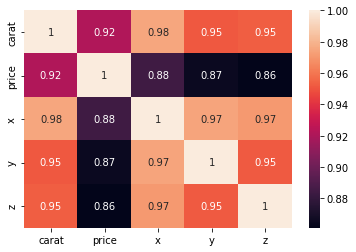

In [107]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            annot= True)

## Question 1: Part 3

In [108]:
myset = set(df['clarity'].values)
mylist = list(myset)
mylist

['SI1', 'VVS2', 'VS1', 'I1', 'SI2', 'VVS1', 'IF', 'VS2']

In [109]:
df1 = df[df['clarity'] == mylist[0]]
df2 = df[df['clarity'] == mylist[1]]
df3 = df[df['clarity'] == mylist[2]]
df4 = df[df['clarity'] == mylist[3]]
df5 = df[df['clarity'] == mylist[4]]
df6 = df[df['clarity'] == mylist[5]]
df7 = df[df['clarity'] == mylist[6]]
df8 = df[df['clarity'] == mylist[7]]

In [110]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
sqrt_list_of_list1 = [[i] for i in df1['carat'].values] 
linreg.fit(sqrt_list_of_list1, df1['price'].values)
print("coef: ",linreg.coef_)
print("intercept: " ,linreg.intercept_)

coef:  [8090.3475054]
intercept:  -2884.695432346119


In [111]:
sqrt_list_of_list2 = [[i] for i in df2['carat'].values] 
linreg.fit(sqrt_list_of_list2, df2['price'].values)
print("coef: ",linreg.coef_)
print("intercept: " ,linreg.intercept_)

coef:  [10077.18805124]
intercept:  -2724.3039286292483


In [112]:
sqrt_list_of_list3 = [[i] for i in df3['carat'].values] 
linreg.fit(sqrt_list_of_list3, df3['price'].values)
print("coef: ",linreg.coef_)
print("intercept: " ,linreg.intercept_)

coef:  [9000.72595443]
intercept:  -2705.4966758167493


In [57]:
sqrt_list_of_list4 = [[i] for i in df4['carat'].values] 
linreg.fit(sqrt_list_of_list4, df4['price'].values)
print("coef: ",linreg.coef_)
print("intercept: " ,linreg.intercept_)

coef:  [4209.79340046]
intercept:  -1480.5583747037222


In [58]:
sqrt_list_of_list5 = [[i] for i in df5['carat'].values] 
linreg.fit(sqrt_list_of_list5, df5['price'].values)
print("coef: ",linreg.coef_)
print("intercept: " ,linreg.intercept_)

coef:  [7870.25544007]
intercept:  -3418.3400994849208


In [59]:
sqrt_list_of_list6 = [[i] for i in df6['carat'].values] 
linreg.fit(sqrt_list_of_list6, df6['price'].values)
print("coef: ",linreg.coef_)
print("intercept: " ,linreg.intercept_)

coef:  [10469.25026504]
intercept:  -2746.283873483337


In [60]:
sqrt_list_of_list7 = [[i] for i in df7['carat'].values] 
linreg.fit(sqrt_list_of_list7, df7['price'].values)
print("coef: ",linreg.coef_)
print("intercept: " ,linreg.intercept_)

coef:  [11625.44062662]
intercept:  -3007.4372354041852


In [61]:
sqrt_list_of_list8 = [[i] for i in df8['carat'].values] 
linreg.fit(sqrt_list_of_list8, df8['price'].values)
print("coef: ",linreg.coef_)
print("intercept: " ,linreg.intercept_)

coef:  [8626.15697327]
intercept:  -2664.8301522581


## Question 1: Part 4

In [113]:
myset = set(df['cut'].values)
mylist = list(myset)
mylist

['Premium', 'Fair', 'Very Good', 'Ideal', 'Good']

In [114]:
colors = {"Ideal": "green", "Good": "orange", "Fair": "blue", "Very Good": "pink", "Premium": "yellow" }

In [115]:
linear_func1 = lambda x: 10469.25026504*x + -2746.283873483337
linear_func2 = lambda x: 11625.44062662*x + -3007.4372354041852
linear_func3 = lambda x: 9000.72595443*x + -2705.4966758167493
linear_func4 = lambda x: 4209.79340046*x + -1480.5583747037222
linear_func5 = lambda x: 10077.18805124*x + -2724.3039286292483
linear_func6 = lambda x: 8090.3475054*x + -2884.695432346119
linear_func7 = lambda x: 7870.25544007*x + -3418.3400994849208
linear_func8 = lambda x: 8626.15697327*x + -2664.8301522581

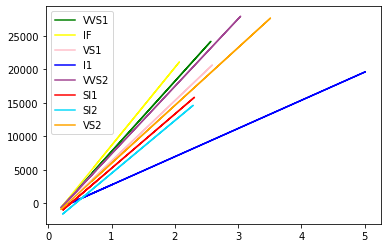

In [117]:
predict_y_values1 = [linear_func1(x) for x in df1['carat']]
predict_y_values2 = [linear_func2(x) for x in df2['carat']]
predict_y_values3 = [linear_func3(x) for x in df3['carat']]
predict_y_values4 = [linear_func4(x) for x in df4['carat']]
predict_y_values5 = [linear_func5(x) for x in df5['carat']]
predict_y_values6 = [linear_func6(x) for x in df6['carat']]
predict_y_values7 = [linear_func7(x) for x in df7['carat']]
predict_y_values8 = [linear_func8(x) for x in df8['carat']]


plt.plot(df1['carat'],predict_y_values1, color= 'green', label = "VVS1")
plt.plot(df2['carat'],predict_y_values2, color= 'yellow', label = "IF")
plt.plot(df3['carat'],predict_y_values3, color= 'pink', label = "VS1")
plt.plot(df4['carat'],predict_y_values4, color= 'blue', label = "I1")
plt.plot(df5['carat'],predict_y_values5, color= '#A24693', label = "VVS2")
plt.plot(df6['carat'],predict_y_values6, color= 'red', label = "SI1")
plt.plot(df7['carat'],predict_y_values7, color= '#0BDAFA', label = "SI2")
plt.plot(df8['carat'],predict_y_values8, color= 'orange', label = "VS2")
plt.legend();

## Question 1: Part 5

In [66]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3)

In [95]:
from sklearn.linear_model import LinearRegression
mlinreg = LinearRegression()

data_values_list = []
data_points_list = [row.values for index, row in  train_df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].iterrows()]
mlinreg.fit(data_points_list, train_df['price'].values)
print("coef: " , mlinreg.coef_)
print("intercept: ", mlinreg.intercept_)

coef:  [-3.26343163e-12 -1.53432822e-13 -1.64495154e-15  1.00000000e+00
  6.70801305e-15 -1.17552994e-14  1.38325224e-15]
intercept:  1.0459189070388675e-11


In [96]:
from sklearn import metrics
y_test = test_df['price'].values
y_pred = mlinreg.predict([v for v in test_df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].values])
print(f"Mae value is: {metrics.mean_absolute_error(y_test,y_pred)}")  #MAE

Mae value is: 5.119385325990345e-13


In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test,y_pred))
print(f"Rmse value: {rms}") #RMSE

Rmse value: 9.422563862926233e-13


## Question 2: Part 1

In [71]:
df = pd.read_csv('./datasets/Cars/USA_cars_datasets.csv')
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [72]:
dodge = df.loc[df['brand']== "dodge"]
chevrolet = df.loc[df['brand']== "chevrolet"]

In [124]:
train_dodge_df = dodge[:200]
test_dodge_df = dodge[1000:2000]

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
sqrt_list_of_list = [[i] for i in train_dodge_df['mileage'].values] 
linreg.fit(sqrt_list_of_list, train_dodge_df['price'].values)

LinearRegression()

In [74]:
linreg.coef_ # coefficent b_0

array([-0.14422114])

In [75]:
linreg.intercept_ # b_1

24088.52376377643

The linear regression for dodge is represented by: $y = -0.14422114x + 24088.52376377643$

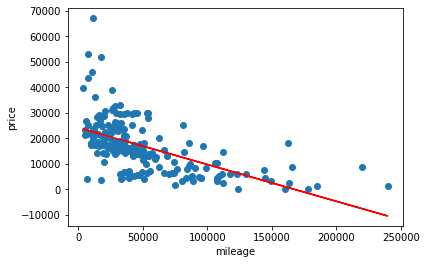

In [76]:
linear_func = lambda x: -0.14422114*x + 24088.52376377643
predict_y_values = [linear_func(x) for x in train_dodge_df['mileage']]
plt.scatter(train_dodge_df['mileage'], train_dodge_df['price'])
plt.xlabel("mileage")
plt.ylabel("price")


#plot the regression line
plt.plot(train_dodge_df['mileage'],predict_y_values, color='red' )

In [123]:
train_chevrolet_df = chevrolet[:200]
test_chevrolet_df = chevrolet[1000:2000]

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
sqrt_list_of_list = [[i] for i in train_chevrolet_df['mileage'].values] 
linreg.fit(sqrt_list_of_list, train_chevrolet_df['price'].values)

LinearRegression()

In [78]:
linreg.coef_ # coefficent b_0

array([-0.10576149])

In [79]:
linreg.intercept_ # b_1

25806.944862475648

The linear regression for chevrolet is represented by: $y = -0.10576149x + 25806.944862475648
$

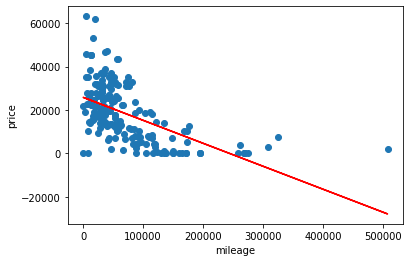

In [80]:
linear_func = lambda x: -0.10576149*x + 25806.944862475648
predict_y_values = [linear_func(x) for x in train_chevrolet_df['mileage']]
plt.scatter(train_chevrolet_df['mileage'], train_chevrolet_df['price'])
plt.xlabel("mileage")
plt.ylabel("price")


#plot the regression line
plt.plot(train_chevrolet_df['mileage'],predict_y_values, color='red' )

## Question 2: Part 2

In [81]:
ford = df.loc[df['brand']== "ford"]
train_ford_df = ford[:200]
test_ford_df = ford[1000:2000]

In [82]:
mlinreg = LinearRegression()

data_values_list = []
data_points_list = [row.values for index, row in  train_ford_df[['mileage','year']].iterrows()]
mlinreg.fit(data_points_list, train_ford_df['price'].values)

LinearRegression()

In [83]:
coef = mlinreg.coef_ # b_1

In [84]:
mlinreg.intercept_ # coefficent b_0

-1119521.766872747

$price = (-4.70622995e-02)*mileage + (5.64303828e+02)*year -1119521.766872747$

## Question 2: Part 3

**2D Representition of the model:**

In [85]:
#!pip install plotly
import plotly.express as px
import pandas as pd

In [86]:
fig = px.scatter(train_ford_df, x="year", y="mileage", color="price")
fig.show()

**3D Representition of the model:**

In [87]:
fig = px.scatter_3d(train_ford_df, x="year", y="mileage", z="price",color = "price")
fig.show()

## Question 3: Part 1

In [88]:
df = pd.read_csv('/content/datasets/Billionaires/Billionaire.csv')

In [89]:
df2 = df.groupby(['Industry']).size().reset_index(name='counts') # creatnig a new df that counts per industry how many billionares are from that industry
new_df = pd.merge(df,df2) # merge both dfs
more_than_3_df = new_df.loc[new_df['counts']> 3] # creates a new df with only billioners that there are 3 or more from thier industry 
more_than_3_df = more_than_3_df.loc[more_than_3_df['Age'] <= 100] # getting rid of annomalys
more_than_3_df

,Name,NetWorth,Country,Source,Rank,Age,Industry,counts
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,365
1,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,365
2,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,365
3,Larry Ellison,$93 B,United States,software,7,76.0,Technology,365
4,Larry Page,$91.5 B,United States,Google,8,48.0,Technology,365
...,...,...,...,...,...,...,...,...
2750,Jerry Reinsdorf,$1.7 B,United States,sports teams,1833,85.0,Sports,24
2751,Michael Jordan,$1.6 B,United States,"Charlotte Hornets, endorsements",1931,58.0,Sports,24
2752,Jim Crane,$1.4 B,United States,"logistics, baseball",2141,67.0,Sports,24
2753,Theodore Leonsis,$1.4 B,United States,sports teams,2141,65.0,Sports,24


In [90]:
more_than_3_df["NetWorth"] = more_than_3_df["NetWorth"].str.replace('$','') # cleaning the data
more_than_3_df["NetWorth"] = more_than_3_df["NetWorth"].str.replace('B','') # cleaning the data
more_than_3_df["NetWorth"] = pd.to_numeric(more_than_3_df["NetWorth"]) # converting str to float
more_than_3_df["Age"] = pd.to_numeric(more_than_3_df["Age"]) # converting str to float

corr, _ = pearsonr(more_than_3_df['NetWorth'], more_than_3_df['Age'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.034


## Question 3: Part 2

(0.0, 100.0)

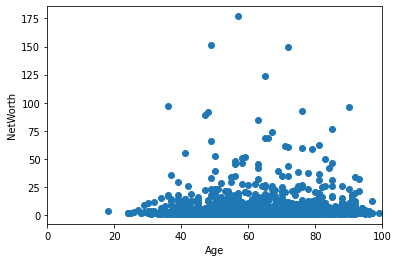

In [122]:
plt.scatter(more_than_3_df['Age'], more_than_3_df['NetWorth'])
plt.xlabel("Age")
plt.ylabel("NetWorth")
plt.xlim(0,100) # the graph without annomalys

**As we saw in Question 3 part 1, the correlation is 0.034(which means there's almost no connection between the age of the billionare and his networth) and it shows on the scatter plot**